In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
data = pd.read_excel("C:\\Users\\bnola\\Documents\\Coding practice\\2018-2019 NHL Stats+Salary.xlsx")

In [195]:
data

,PLAYER,TEAM,AGE,POS,HANDED,GP,G,A,P,P/GP,+/-,Sh,Sh%,TOI,CAP HIT,SALARY
0,1. Zdeno Chara,BOS,41,LD,Left,62,5,9,14,0.23,22,99,0.05,21:04:00,5000000,5000000
1,2. Marián Hossa,ARI,39,RW,Left,0,0,0,0,0,0,0,0,NaN,5275000,1000000
2,3. Joe Thornton,SJS,38,C,Left,73,16,35,51,0.7,8,90,0.18,15:32:00,5000000,5000000
3,4. Johan Franzen,DET,38,"RW, LW",Left,0,0,0,0,0,0,0,0,NaN,3954545,1000000
4,5. Ryan Miller,ANA,37,G,Left,20,-,-,-,-,-,-,-,-,2000000,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496. Sean Kuraly,BOS,25,"C, LW",Left,71,8,13,21,0.3,6,134,0.06,13:46:00,1275000,1300000
496,497. Matt Puempel,DET,25,LW,Left,8,1,0,1,0.13,-2,10,0.1,10:24:00,675000,650000
497,498. Rocco Grimaldi,NSH,25,"LW, RW",Right,53,5,8,13,0.25,-2,81,0.06,10:00:00,650000,650000
498,499. Dillon Simpson,CBJ,25,LD,Left,0,0,0,0,0,0,0,0,NaN,675000,650000


In [196]:
df = data.dropna(axis=0, how='any')

In [197]:
players = df.mask(df.POS == 'G')
players = players.dropna(axis=0, how='any')

In [198]:
players = players.drop(['TOI', 'CAP HIT'], axis=1)

In [199]:
Y = players['SALARY'].values

In [219]:
Y = Y/1000000.000

In [201]:
X = players.drop(['PLAYER','TEAM', 'POS', 'HANDED', 'Sh', 'SALARY'], axis=1).values

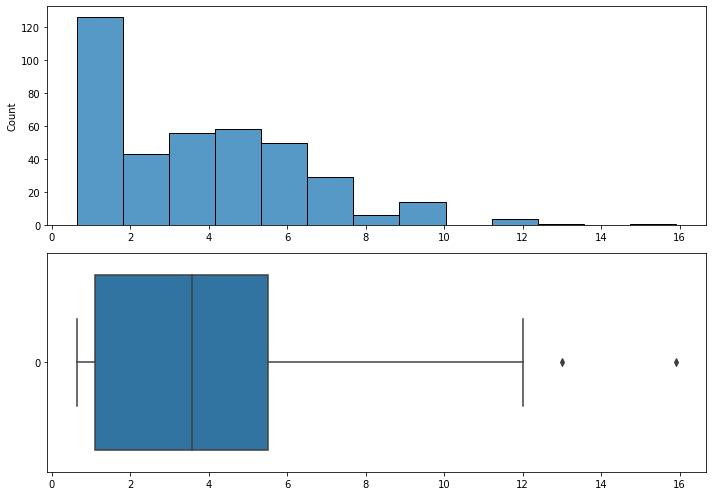

In [389]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(data=Y)
fig.add_subplot(2,1,2)
sns.boxplot(data=Y, orient='h')
plt.tight_layout()

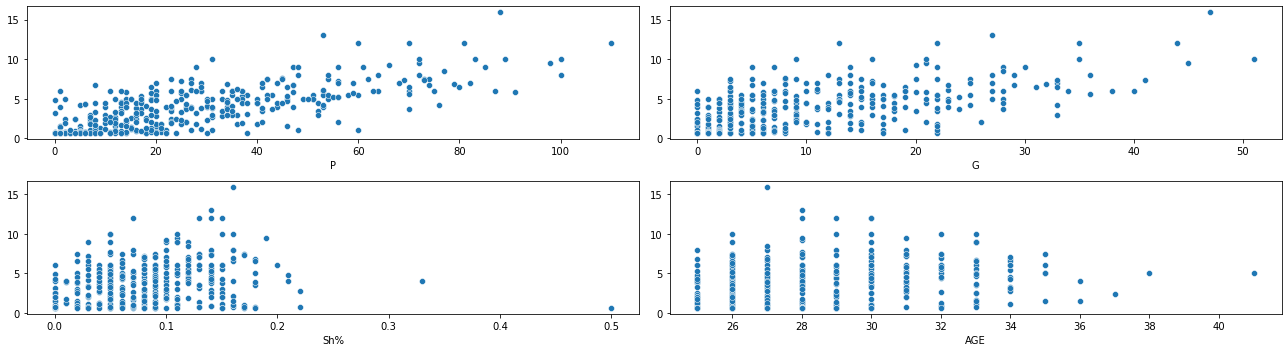

In [387]:
fig = plt.figure(figsize=(18,5));
fig.add_subplot(2,2,1)
sns.scatterplot(x=players['P'],y= Y)
fig.add_subplot(2,2,2)
sns.scatterplot(x=players['G'],y= Y)
fig.add_subplot(2,2,3)
sns.scatterplot(x=players['Sh%'],y= Y)
fig.add_subplot(2,2,4)
sns.scatterplot(x=players['AGE'],y= Y);
fig.tight_layout()

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [364]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [365]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)

3.671590088803089
[ 0.53179565  0.43830431  0.30615371  0.12359494  0.21596906  1.49741906
 -0.28506636 -0.67221606]


In [366]:
y_pred_reg = regressor.predict(X_test)

In [367]:
coeff_df = pd.DataFrame(regressor.coef_, players.drop(['PLAYER','TEAM', 'POS', 'HANDED', 'Sh', 'SALARY'], axis=1).columns, columns=['Coefficient'])
coeff_df

,Coefficient
AGE,0.531796
GP,0.438304
G,0.306154
A,0.123595
P,0.215969
P/GP,1.497419
+/-,-0.285066
Sh%,-0.672216


<Figure size 720x360 with 0 Axes>

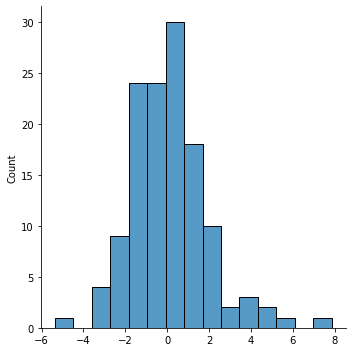

In [368]:
fig = plt.figure(figsize=(10,5));
resids = (Y_test - y_pred_reg)
sns.displot(resids);

In [369]:
y_pred = regressor.predict(X_test)
predictions_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1 = predictions_df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_test,y_pred))

MAE: 1.3865463803140319
MSE: 3.4737317868816895
RMSE: 1.8637949959375064
VarScore: 0.6055151634325173


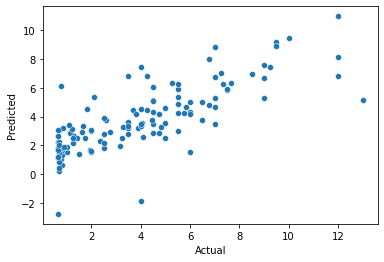

In [370]:
sns.scatterplot(x = df['Actual'], y = df['Predicted']);

Epoch 1/100
26/26 [==============================] - 0s 5ms/step - loss: 18.8758 - val_loss: 20.8739
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 16.4324 - val_loss: 17.8381
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 13.9714 - val_loss: 14.6517
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 11.3886 - val_loss: 11.8602
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 9.2369 - val_loss: 9.1813
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 7.3855 - val_loss: 7.2568
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 6.1106 - val_loss: 5.9816
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 5.3118 - val_loss: 5.2382
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 4.8427 - val_loss: 4.7839
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 4.5506 - val_loss: 4.4913
E

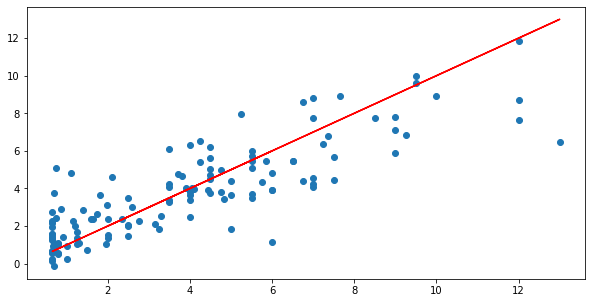

In [380]:
def hockey_model(x):
    model = keras.Sequential([keras.layers.Dense(8, activation='relu'), 
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(1)])
    model.compile(loss='mse',
                optimizer='Adam')
    model.fit(x=X_train, y=Y_train, batch_size=10, epochs=100, validation_data=(X_test, Y_test))
    history = model.predict(x)
    fig = plt.figure(figsize=(10,5))
    plt.scatter(Y_test,y_pred)
    plt.plot(Y_test,Y_test,'r')
    return
hockey_model(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_test,y_pred))

<AxesSubplot:>

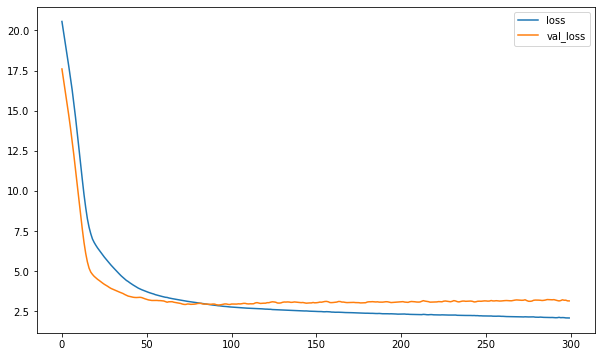

In [373]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(10,6))